<a href="https://colab.research.google.com/github/BradleyAgwa/GOAL-DIGGING-ACES/blob/main/Copy_of_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CUSTOMER PERSONALITY ANALYSIS

## 1.1 Introduction
In this era of globalization, the competition among firms producing the same goods and services has intensified and the consumer, who is considered the principal focal point in modern business approach, becomes more and more important. On The Go, an online shopping company, wants a detailed analysis of their company’s past customers. They believe customer profile analysis will help inform the business on how to modify its marketing campaigns.
## Problem Statement 
Past marketing campaigns have not brought in as many customers as expected. In addition, the customers that have responded to  the campaigns have not bought as many products as expected.


## 1.2Importing Our Libraries

In [ ]:
# Loading our libraries i.e pandas and numpy libraries
import pandas as pd
import numpy as np

## 1.3 Loading Our Dataset

In [ ]:
# Loading the dataset we are going to work on.
marketing = pd.read_csv('/content/marketing_campaign.csv',delimiter='\t', index_col=['ID'])
marketing.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1


Here we can see a preview of our columns and the first 10 entries in our dataset.

In [ ]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null 

Above is the overall information of dataset, stating the columns(28), with 2240 entries, and also we can see the data types.

In [ ]:
marketing.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


A described view of our table

In [ ]:
marketing.size

62720

A check on the size of our table

In [ ]:
marketing.shape

(2240, 28)

A check on the shape of our table

In [ ]:
marketing.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

From the check done above we can see we have 24 null values

In [ ]:
marketing.duplicated().sum()

182

Our dataset has 182 duplicated values

## 1.4  Data Cleaning

### Validity

In [ ]:
# Procedure 1
# Data Cleaning Action: Dropping the "Year_Birth" column
# Explanation: It is irrelevant to our analysis.

marketing_new = marketing.drop(['Year_Birth'], axis=1, inplace=True)
marketing_new

In [ ]:
# Procedure 2
# Data Cleaning Action: Dropping the "Dt_customer" column
# Explanation: It is irrelevant to our analysis.

marketing_new = marketing.drop(['Dt_Customer'], axis=1, inplace=True)
marketing_new

In [ ]:
# Procedure 3
# Data Cleaning Action: Joining all the purchases columns
# Explanation: This is to help us easily manipulate all the purchases under one general column called purchases

purchases1 = marketing['NumDealsPurchases'] + marketing['NumWebPurchases'] + marketing['NumCatalogPurchases'] + marketing['NumStorePurchases']
marketing['number_purchases'] = purchases1

In [ ]:
# Procedure 4
# Data Cleaning Action: Joining all the products columns
# Explanation: This is to help us easily manipulate all the products under one general column called total_spent

total_spent1 = marketing['MntWines'] + marketing['MntFruits'] + marketing['MntMeatProducts'] + marketing['MntFishProducts'] + marketing['MntSweetProducts'] + marketing['MntGoldProds']
marketing['total_spent'] = total_spent1

In [ ]:
# Procedure 5
# Data Cleaning Action: Joining all the purchases columns
# Explanation: This is to help us easily manipulate all the children under one general column called children
children1 = marketing['Kidhome'] + marketing['Teenhome'] 
marketing['children'] = children1

In [ ]:
# Procedure 6
# Data Cleaning Action: Joining all the purchases columns
# Explanation: This is to help us easily manipulate all the luxuries under one general column called luxuries.
luxuries1 = marketing['MntWines'] + marketing['MntSweetProducts'] + marketing['MntGoldProds'] 
marketing['luxuries'] = luxuries1

Since we have combined our four Purchases columns we proceeded to drop them because now they are under one purchase column.

In [ ]:
# Procedure 7
# Data Cleaning Action: Dropping the "NumDealsPurchases" column
# Explanation: It's an unneccessary column as its count is already catered for in the purchases column

marketing_new = marketing.drop(['NumDealsPurchases'], axis=1, inplace=True)
marketing_new

In [ ]:
# Procedure 8
# Data Cleaning Action: Dropping the "NumWebPurchases" column
# Explanation: It's an unneccessary column as its count is already catered for in the purchases column

marketing_new = marketing.drop(['NumWebPurchases'], axis=1, inplace=True)
marketing_new

In [ ]:
# Procedure 9
# Data Cleaning Action: Dropping the "NumCatalogPurchases" column
# Explanation: It's an unneccessary column as its count is already catered for in the purchases column


marketing_new = marketing.drop(['NumCatalogPurchases'], axis=1, inplace=True)
marketing_new

In [ ]:
# Procedure 10
# Data Cleaning Action: Dropping the "NumStorePurchases" column
# Explanation: It's an unneccessary column as its count is already catered for in the purchases column


marketing_new = marketing.drop(['NumStorePurchases'], axis=1, inplace=True)
marketing_new

In [ ]:
# Procedure 11
# Data Cleaning Action: Joining the MntFruits, MntMeatProducts, MntFishProducts columns
# Explanation: This is to help us easily work with all the food products under one column called "food"

food1 = marketing['MntFruits'] + marketing['MntMeatProducts'] + marketing['MntFishProducts']
marketing['food'] = food1

In [ ]:
# Previewing our table
marketing.head(5)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,number_purchases,total_spent,children,luxuries,food
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,7,0,0,0,0,0,0,3,11,1,25,1617,0,811,806
2174,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,5,0,0,0,0,0,0,3,11,0,6,27,2,18,9
4141,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,4,0,0,0,0,0,0,3,11,0,21,776,0,489,287
6182,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,6,0,0,0,0,0,0,3,11,0,8,53,1,19,34
5324,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,0,0,0,0,0,0,3,11,0,19,422,1,215,207


### Accuracy

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


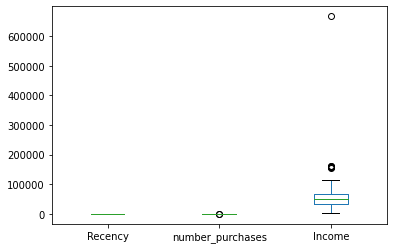

In [ ]:
# Procedure 1:
# Data Cleaning Action: Checking for outliers
# Explanation: This will assist us to understand how accurate our data is.
# We will first import the matplot library

import matplotlib.pyplot as plt 
% matplotlib inline

marketing_matplotlib = marketing.boxplot(column =['Recency','number_purchases', 'Income'], grid = False)
marketing_matplotlib;

We can see that on our income and purchases that there are outliers, but since they are few and  it is reflective of true data so there's no reason why they should  be dropped

### Completeness 

In [ ]:
# Procedure 1:
# Data Cleaning Action: Checking the count of null values if there is any
# Explanation: This will enables us to figure out if the data is complete thus easing manipulation

marketing.isnull().sum()


Education             0
Marital_Status        0
Income               24
Kidhome               0
Teenhome              0
Recency               0
MntWines              0
MntFruits             0
MntMeatProducts       0
MntFishProducts       0
MntSweetProducts      0
MntGoldProds          0
NumWebVisitsMonth     0
AcceptedCmp3          0
AcceptedCmp4          0
AcceptedCmp5          0
AcceptedCmp1          0
AcceptedCmp2          0
Complain              0
Z_CostContact         0
Z_Revenue             0
Response              0
number_purchases      0
total_spent           0
children              0
luxuries              0
food                  0
dtype: int64

From the data above we can see that we have about 24 null values under the income column.

In [ ]:
# Procedure 2
# Data Cleaning Action: Filling in the null values
# Explanation: Finding the mean of the income colume to help us fill in the null values.
#
income_mean = marketing['Income'].mean()
marketing['Income'].fillna(value=income_mean, inplace=True)

# Checking if there are no null values now.
marketing.isnull().sum()


Education            0
Marital_Status       0
Income               0
Kidhome              0
Teenhome             0
Recency              0
MntWines             0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
MntGoldProds         0
NumWebVisitsMonth    0
AcceptedCmp3         0
AcceptedCmp4         0
AcceptedCmp5         0
AcceptedCmp1         0
AcceptedCmp2         0
Complain             0
Z_CostContact        0
Z_Revenue            0
Response             0
number_purchases     0
total_spent          0
children             0
luxuries             0
food                 0
dtype: int64

We can now see that our dataset is clean of null values.

### Consistency

In [ ]:
# Procedure 1:
# Data Cleaning Action: Check for duplicate values.
# Explanation: This is to allow us determine data that is duplicated.
#
marketing_dup= marketing.duplicated().sum()
marketing_dup

182

In [ ]:
# Procedure 2:
# Data Cleaning Action: Dropping duplicated values if they exist.
# Explanation: This is to allow us determine data that is duplicated.
#
marketing_new = marketing.drop_duplicates(keep=False,inplace=True)
marketing.head(5)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,number_purchases,total_spent,children,luxuries,food
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,7,0,0,0,0,0,0,3,11,1,25,1617,0,811,806
2174,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,5,0,0,0,0,0,0,3,11,0,6,27,2,18,9
4141,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,4,0,0,0,0,0,0,3,11,0,21,776,0,489,287
6182,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,6,0,0,0,0,0,0,3,11,0,8,53,1,19,34
5324,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,0,0,0,0,0,0,3,11,0,19,422,1,215,207


In [ ]:
# Checking if they are still there
marketing.duplicated().sum()

0

Our data is now clean of duplicated values

### Uniformity

In [ ]:
# Procedure 1:
# Data Cleaning Action: Converting column names to lowercase characters.
# Explanation: This is to allow for a uniform columns in the data column names.
#
marketing.columns = marketing.columns.str.rstrip().str.lower()
marketing.head(5)

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,number_purchases,total_spent,children,luxuries,food
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,7,0,0,0,0,0,0,3,11,1,25,1617,0,811,806
2174,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,5,0,0,0,0,0,0,3,11,0,6,27,2,18,9
4141,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,4,0,0,0,0,0,0,3,11,0,21,776,0,489,287
6182,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,6,0,0,0,0,0,0,3,11,0,8,53,1,19,34
5324,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,0,0,0,0,0,0,3,11,0,19,422,1,215,207


## 1.3 Data Analysis

### Comparing the different education levels and buying behaviours

We will look at how the campaigns and purchases of different products were afffected by the various levels of education

In [ ]:
# How many customers responded positively to the campaigns according to their education levels
# this is the first campaign
education = marketing.groupby(['education'])['acceptedcmp1'].sum().sort_values(ascending=False)
education.head()

education
Graduation    72
PhD           26
Master        18
2n Cycle      10
Basic          0
Name: acceptedcmp1, dtype: int64

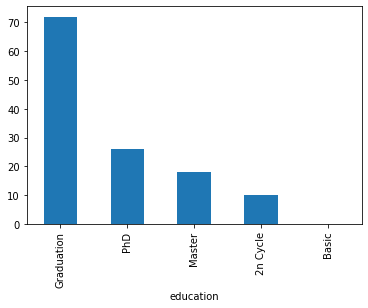

In [ ]:
# plotting a bar graph
education.plot(x = 'education' , y = 'acceptedcmp1' , kind = 'bar');

From the data above, the 1st campaign was well recieved by the graduation educational level

In [ ]:
# this is the fifth campaign
education5= marketing.groupby(['education'])['acceptedcmp5'].sum().sort_values(ascending=False)
education5.head()

education
Graduation    67
PhD           33
Master        26
2n Cycle       8
Basic          0
Name: acceptedcmp5, dtype: int64

The fifth and last campaign too was popular with the people that had just graduated, let's keep that in mind and see if the marketing campaigns had any effect on how the customers shop.

In [ ]:
# How much money was spent on food stuffs by the various levels of education
educationf= marketing.groupby(['education'])['food'].sum().sort_values(ascending=False)
educationf.head()

education
Graduation    242744
PhD            84461
Master         70098
2n Cycle       36866
Basic           1855
Name: food, dtype: int64

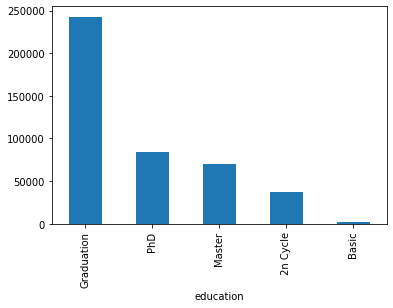

In [ ]:
# plotting a bar graph
educationf.plot(x = 'education' , y = 'food' , kind = 'bar');

The graduated people were the more frequent buyers of foodstuff as compared to the others, with the PhD people following on second.

In [ ]:
# How much money was spent on gold products by the various levels of education
educationg= marketing.groupby(['education'])['mntgoldprods'].sum().sort_values(ascending=False)
educationg.head()

education
Graduation    46974
PhD           13507
Master        13002
2n Cycle       7899
Basic           997
Name: mntgoldprods, dtype: int64

It seems like due to the popularity of the campaigns among the graduated people, they spent more on the products from the shop as compared to the othe education levels.

### Comparing the different marital status and buying behaviours

In [ ]:
# How many customers responded positively to the campaigns according to their marital status
# this is the first campaign
marital = marketing.groupby(['marital_status'])['acceptedcmp1'].sum().sort_values(ascending=False)
marital.head()

marital_status
Married     57
Single      29
Together    24
Divorced    10
Widow        5
Name: acceptedcmp1, dtype: int64

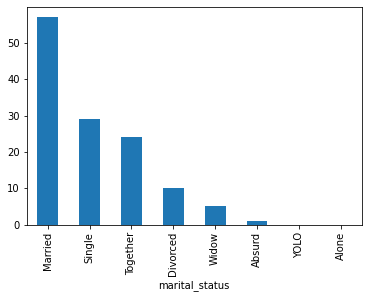

In [ ]:
# plotting a bar graph
marital.plot(x = 'marital_status' , y = 'acceptedcmp1' , kind = 'bar');

The first campaign was popular among the couples as compared to single people

In [ ]:
# this is the fifth campaign
marital5 = marketing.groupby(['marital_status'])['acceptedcmp5'].sum().sort_values(ascending=False)
marital5.head()

marital_status
Married     52
Together    35
Single      27
Divorced    11
Widow        8
Name: acceptedcmp5, dtype: int64

The fifth campaign too, was popular among couples as compared to the single people, there's an interesting trend here, let us see how it will affect the buying nature of the various people based on their marital status.

In [ ]:
# How much money was spent on food by people of different marital status
maritalf = marketing.groupby(['marital_status'])['food'].sum().sort_values(ascending=False)
maritalf.head()

marital_status
Married     165145
Together    108709
Single       99865
Divorced     42244
Widow        18628
Name: food, dtype: int64

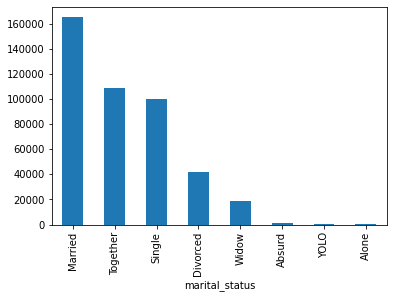

In [ ]:
# plotting a bar graph
maritalf.plot(x = 'marital_status' , y = 'food' , kind = 'bar');

The people that were coupled (i.e Married & Together) spent more on wines as compared to the single,divorced and widowed people

In [ ]:
# How much money was spent on wine by people of different marital status
maritalw = marketing.groupby(['marital_status'])['mntwines'].sum().sort_values(ascending=False)
maritalw.head()

marital_status
Married     219247
Together    140804
Single      119745
Divorced     64483
Widow        26298
Name: mntwines, dtype: int64

The people that were coupled are still the ones that spent more on wines as compared to the single,divorced and widowed people

An interesting insight to note here is that, the campaigns done seem to be very popular among the coupled people as compared to the single,divorced and widowed, making the couples buy the different products more than the other do.

### How the number of kids affected the purchasing behaviour of customers

In [ ]:
# How did the number of children at home affect the total spent
kids= marketing.groupby(['children'])['total_spent'].sum().sort_values(ascending=False)
kids.head(10)

children
0    589422
1    451769
2     88786
3     12278
Name: total_spent, dtype: int64

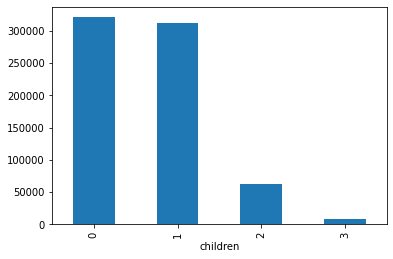

In [ ]:
# plotting a bar graph
kids.plot(x = 'children' , y = 'total_spent' , kind = 'bar');

Customers with no children had the highest spending and the amount decreased with increase in the number of children

In [ ]:
# How did number of children at home affect the amount spent on food
kids= marketing.groupby(['children'])['food'].sum().sort_values(ascending=False)
kids.head(10)

children
0    268217
1    138605
2     25548
3      3654
Name: food, dtype: int64

The amount spent on foodstuffs decreased with an increase in the number of children.

In [ ]:
# How did children at home affect the amount spent on luxuries
kids= marketing.groupby(['children'])['luxuries'].sum().sort_values(ascending=False)
kids.head(10)

children
0    321205
1    313164
2     63238
3      8624
Name: luxuries, dtype: int64

The amount spent on luxuries decreased with an increase in the number of children

### Comparing the married people to the single people.

We are going to do this by comparing the number of purchases that each make.

In [ ]:
# let's compare the number of purchases in our store by married people to single people.
# this works out the number of purchases by married people
maritalm = marketing[(marketing['marital_status']=='Married')]
maritalm.groupby(['marital_status'])['total_spent'].sum().sort_values(ascending=False).head()


marital_status
Married    435268
Name: total_spent, dtype: int64

In [ ]:
# this works out the number of purchases by single people
single = marketing[(marketing['marital_status']=='Single')]
single.groupby(['marital_status'])['total_spent'].sum().sort_values(ascending=False).head()

marital_status
Single    249478
Name: total_spent, dtype: int64

Married people purchased nearly twice as much as single people.


### Finding out which group customers spent the highest amount given all their atributes.

In [ ]:
# Finding out which group customers spent the highest amount given all their atributes.
marketing.groupby(['education' , 'marital_status', 'income' , 'children'], as_index=False)['total_spent'].sum().max()

education            PhD
marital_status      YOLO
income            666666
children               3
total_spent         5050
dtype: object

Customers who had a PhD, with an income of 666666, with 3 children and who described their status as YOLO had the highest combined spending.

## Recommendation

1. The marital status of interest seems to be the coupled ones, so we must focus on selling products fitting them.

2. People that have graduated buy from the shop frequently and products that enjoy should be focused on.

3. Food is a very popular commodity from our shop, whether considering education level or marital status and as such supply should be increased.

4. The next marketing campaign should focus on customers with one to three children so as to increase their spendings on foodstuffs and luxuries.

5. Work needs to be done to make the shop and its campaigns more appealing to the people with basic and 2nd cycle education level, probably do more campaigns that relate to them as this will increase how they interacte with the shop and also get in more revenue.



